In [1]:
import pyglet
from pyglet.window import mouse
from pyglet.window import key
import numpy as np
from Environment import Environment
from Agent import Agent
from time import time

In [ ]:
s = [0.3, 0.3, 0.3] * 4
s

In [2]:
pyglet.canvas.get_display().get_default_screen()

Win32Screen(x=0, y=0, width=1920, height=1080)

In [3]:
env = Environment()
env.make(3)

agent = Agent(env.cell_nb)

score_Hist = []
ALoss_Hist = []
CLoss_Hist = []

num_episodes = 10
num_actions = 1000
for i in range(num_episodes):
    t0 = time()
    score = 0
    f_map = env.reset()
    episode_Hist = []
    eALoss = []
    eCLoss = []
    for k in range(num_actions):
        actions = agent.choose_action(f_map)
        episode = env.step(actions)
        env.render()
        actor_loss, critic_loss = agent.learn(episode)
        eALoss.append(actor_loss)
        eCLoss.append(critic_loss)
        score += episode["r"]
        episode_Hist.append(episode["r"])
    score_Hist.append(score)
    ALoss_Hist.append(np.mean(eALoss))
    CLoss_Hist.append(np.mean(eCLoss))

    print(f"episode {i} with score {score}, which took {np.round(time() - t0, 3)}s")
    #print(f"rewards {episode_Hist} average {np.mean(episode_Hist)}")


AttributeError: 'float' object has no attribute 'shape'

In [4]:
import matplotlib.pyplot as plt


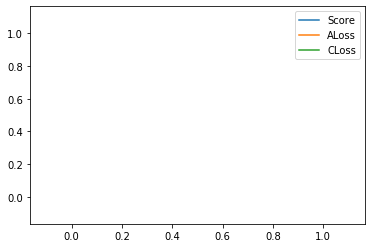

In [5]:
plt.plot(score_Hist)
plt.plot(ALoss_Hist)
plt.plot(CLoss_Hist)
plt.legend(["Score", "ALoss", "CLoss"])

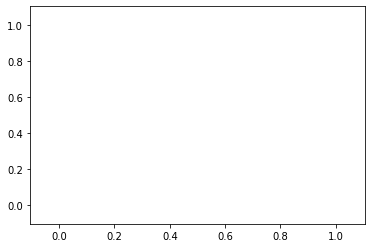

In [6]:
plt.plot(ALoss_Hist)
plt.plot(CLoss_Hist)